In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Import dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocess the data

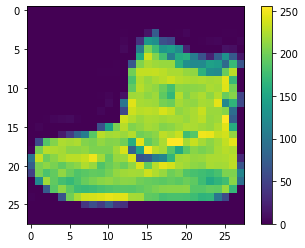

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Effectively min-max scaling
train_images = train_images / 255.0

test_images = test_images / 255.0

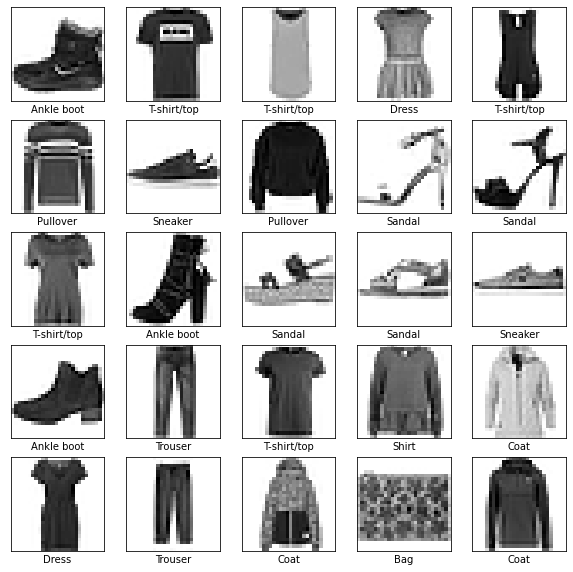

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [10]:
# Hyper-parameters
num_hidden_nodes = 128 #64
activation_func = 'relu' #'sigmoid' #'tanh'
epochs = 10

In [11]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Flatten from matrix to vector
    tf.keras.layers.Dense(num_hidden_nodes, activation=activation_func), # Hidden layer with 128 nodes
    tf.keras.layers.Dense(10), # Output layer with 10-labels (logits array)
    tf.keras.layers.Softmax() # Convert outputs to probabilities
])

In [24]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),# `from_logits=True` if output/last layer emits logits
                metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3877 - accuracy: 0.8857
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8906
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8963
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8995
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9024
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9056
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9091
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2411 - accuracy: 0.9112
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2338 - accuracy: 0.9131
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.226

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 0s - loss: 0.3490 - accuracy: 0.8815
Test accuracy: 0.8815000057220459


In [21]:
predictions = model.predict(test_images)

In [22]:
# argmax to get index with max probability
print(f'predicted: {np.argmax(predictions[0])}, actual: {test_labels[0]}')

predicted: 9, actual: 9


In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'

  # Print predicted label with its probability, true label and color coding
  # to indicate (in)correct prediction
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

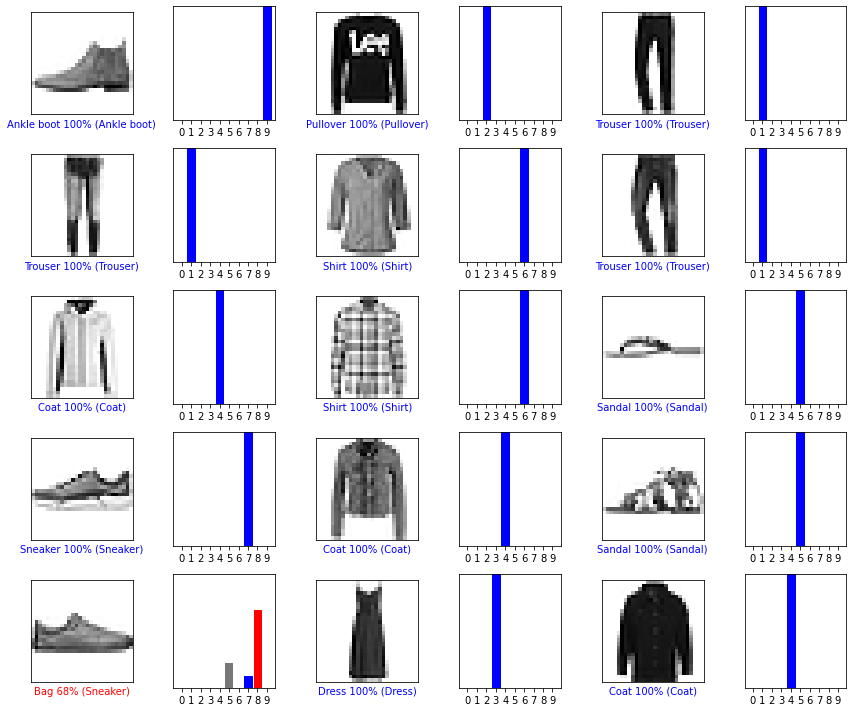

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

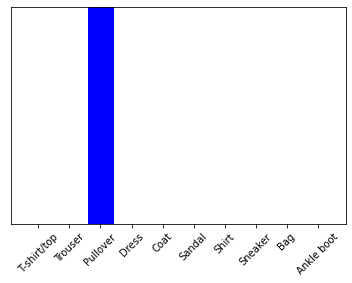

In [23]:
# Grab an image from the test dataset.
img = test_images[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)